In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.read_csv("/kaggle/input/engagement/y_posts.csv")

# EDA

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


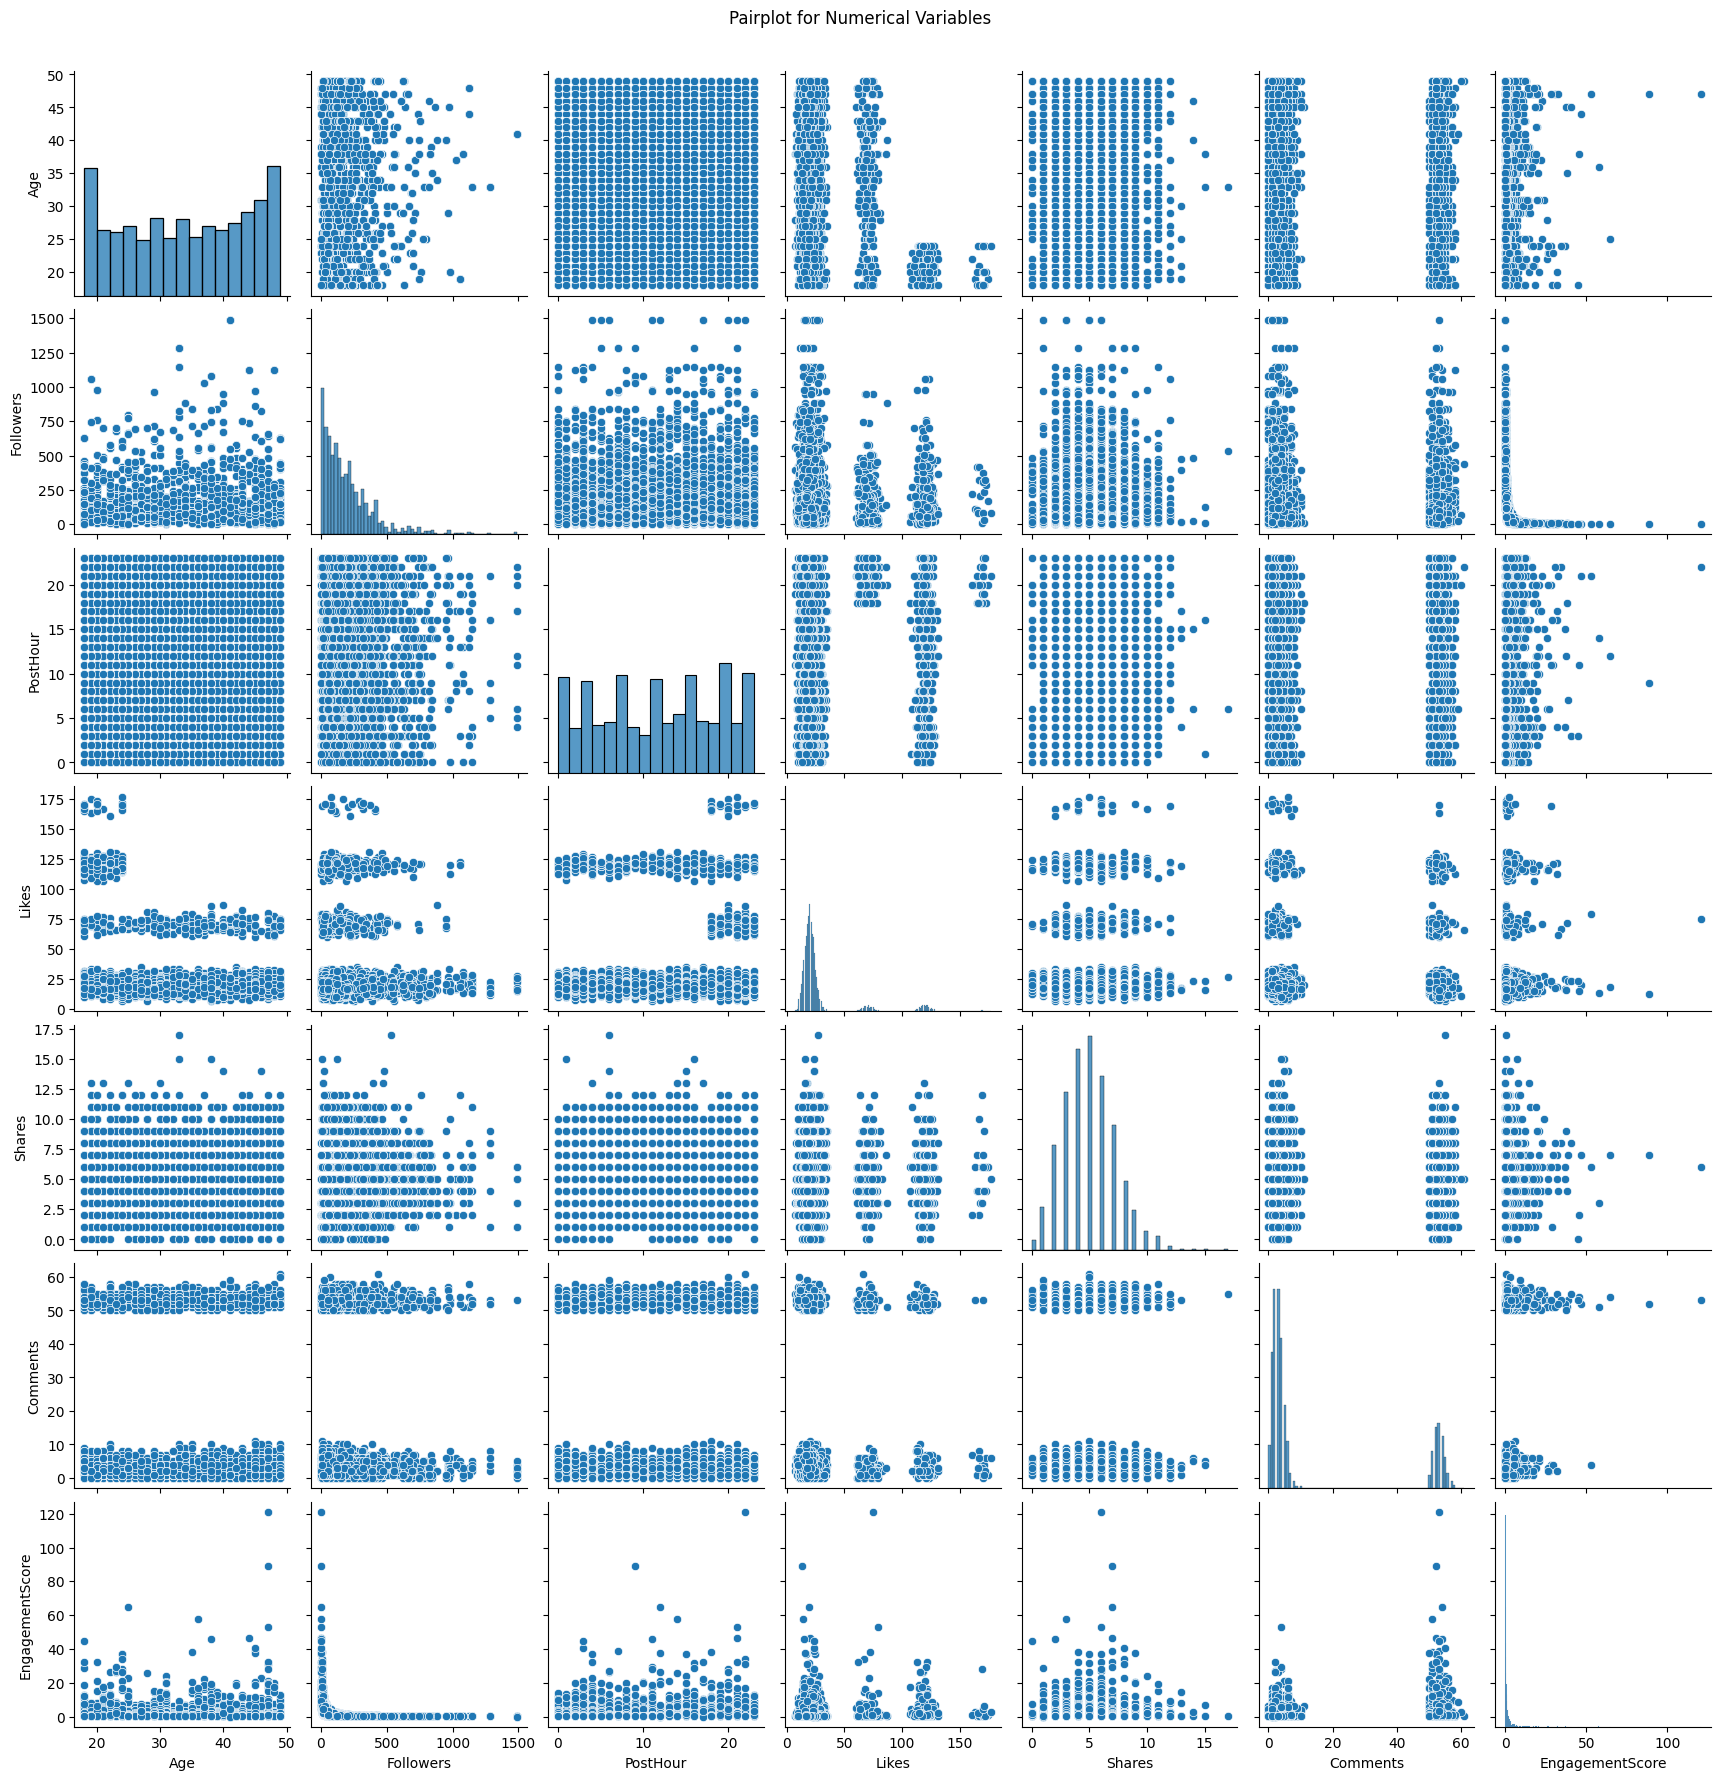

In [101]:
# Pairplot visualization
sns.pairplot(df, vars=["Age", "Followers", "PostHour", "Likes", "Shares", "Comments", "EngagementScore"])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()

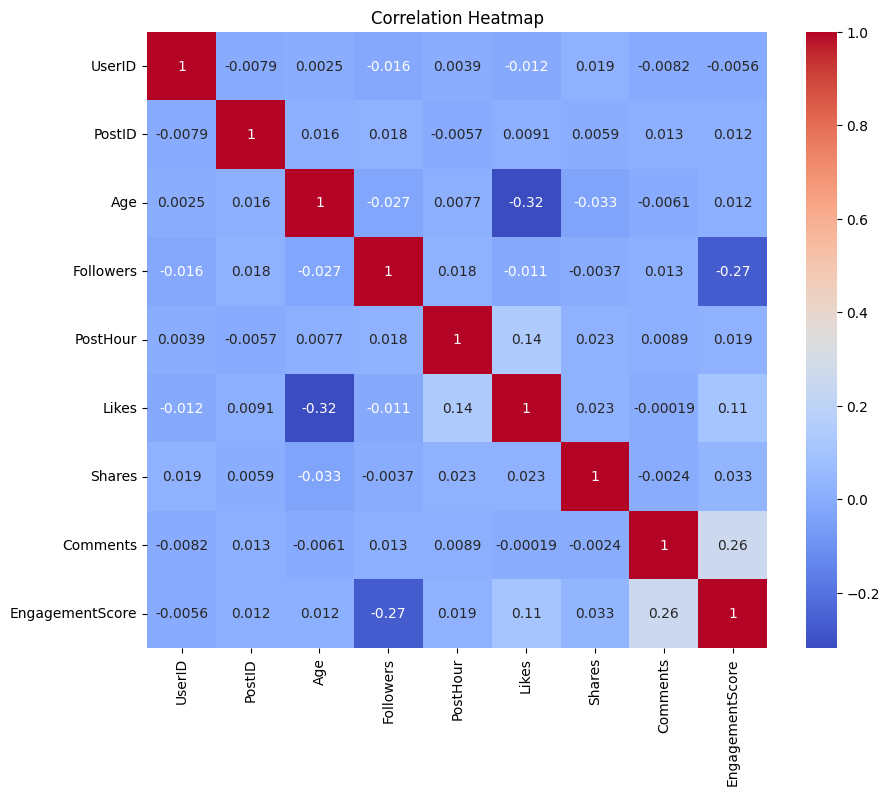

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame loaded from the CSV
# Remove non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



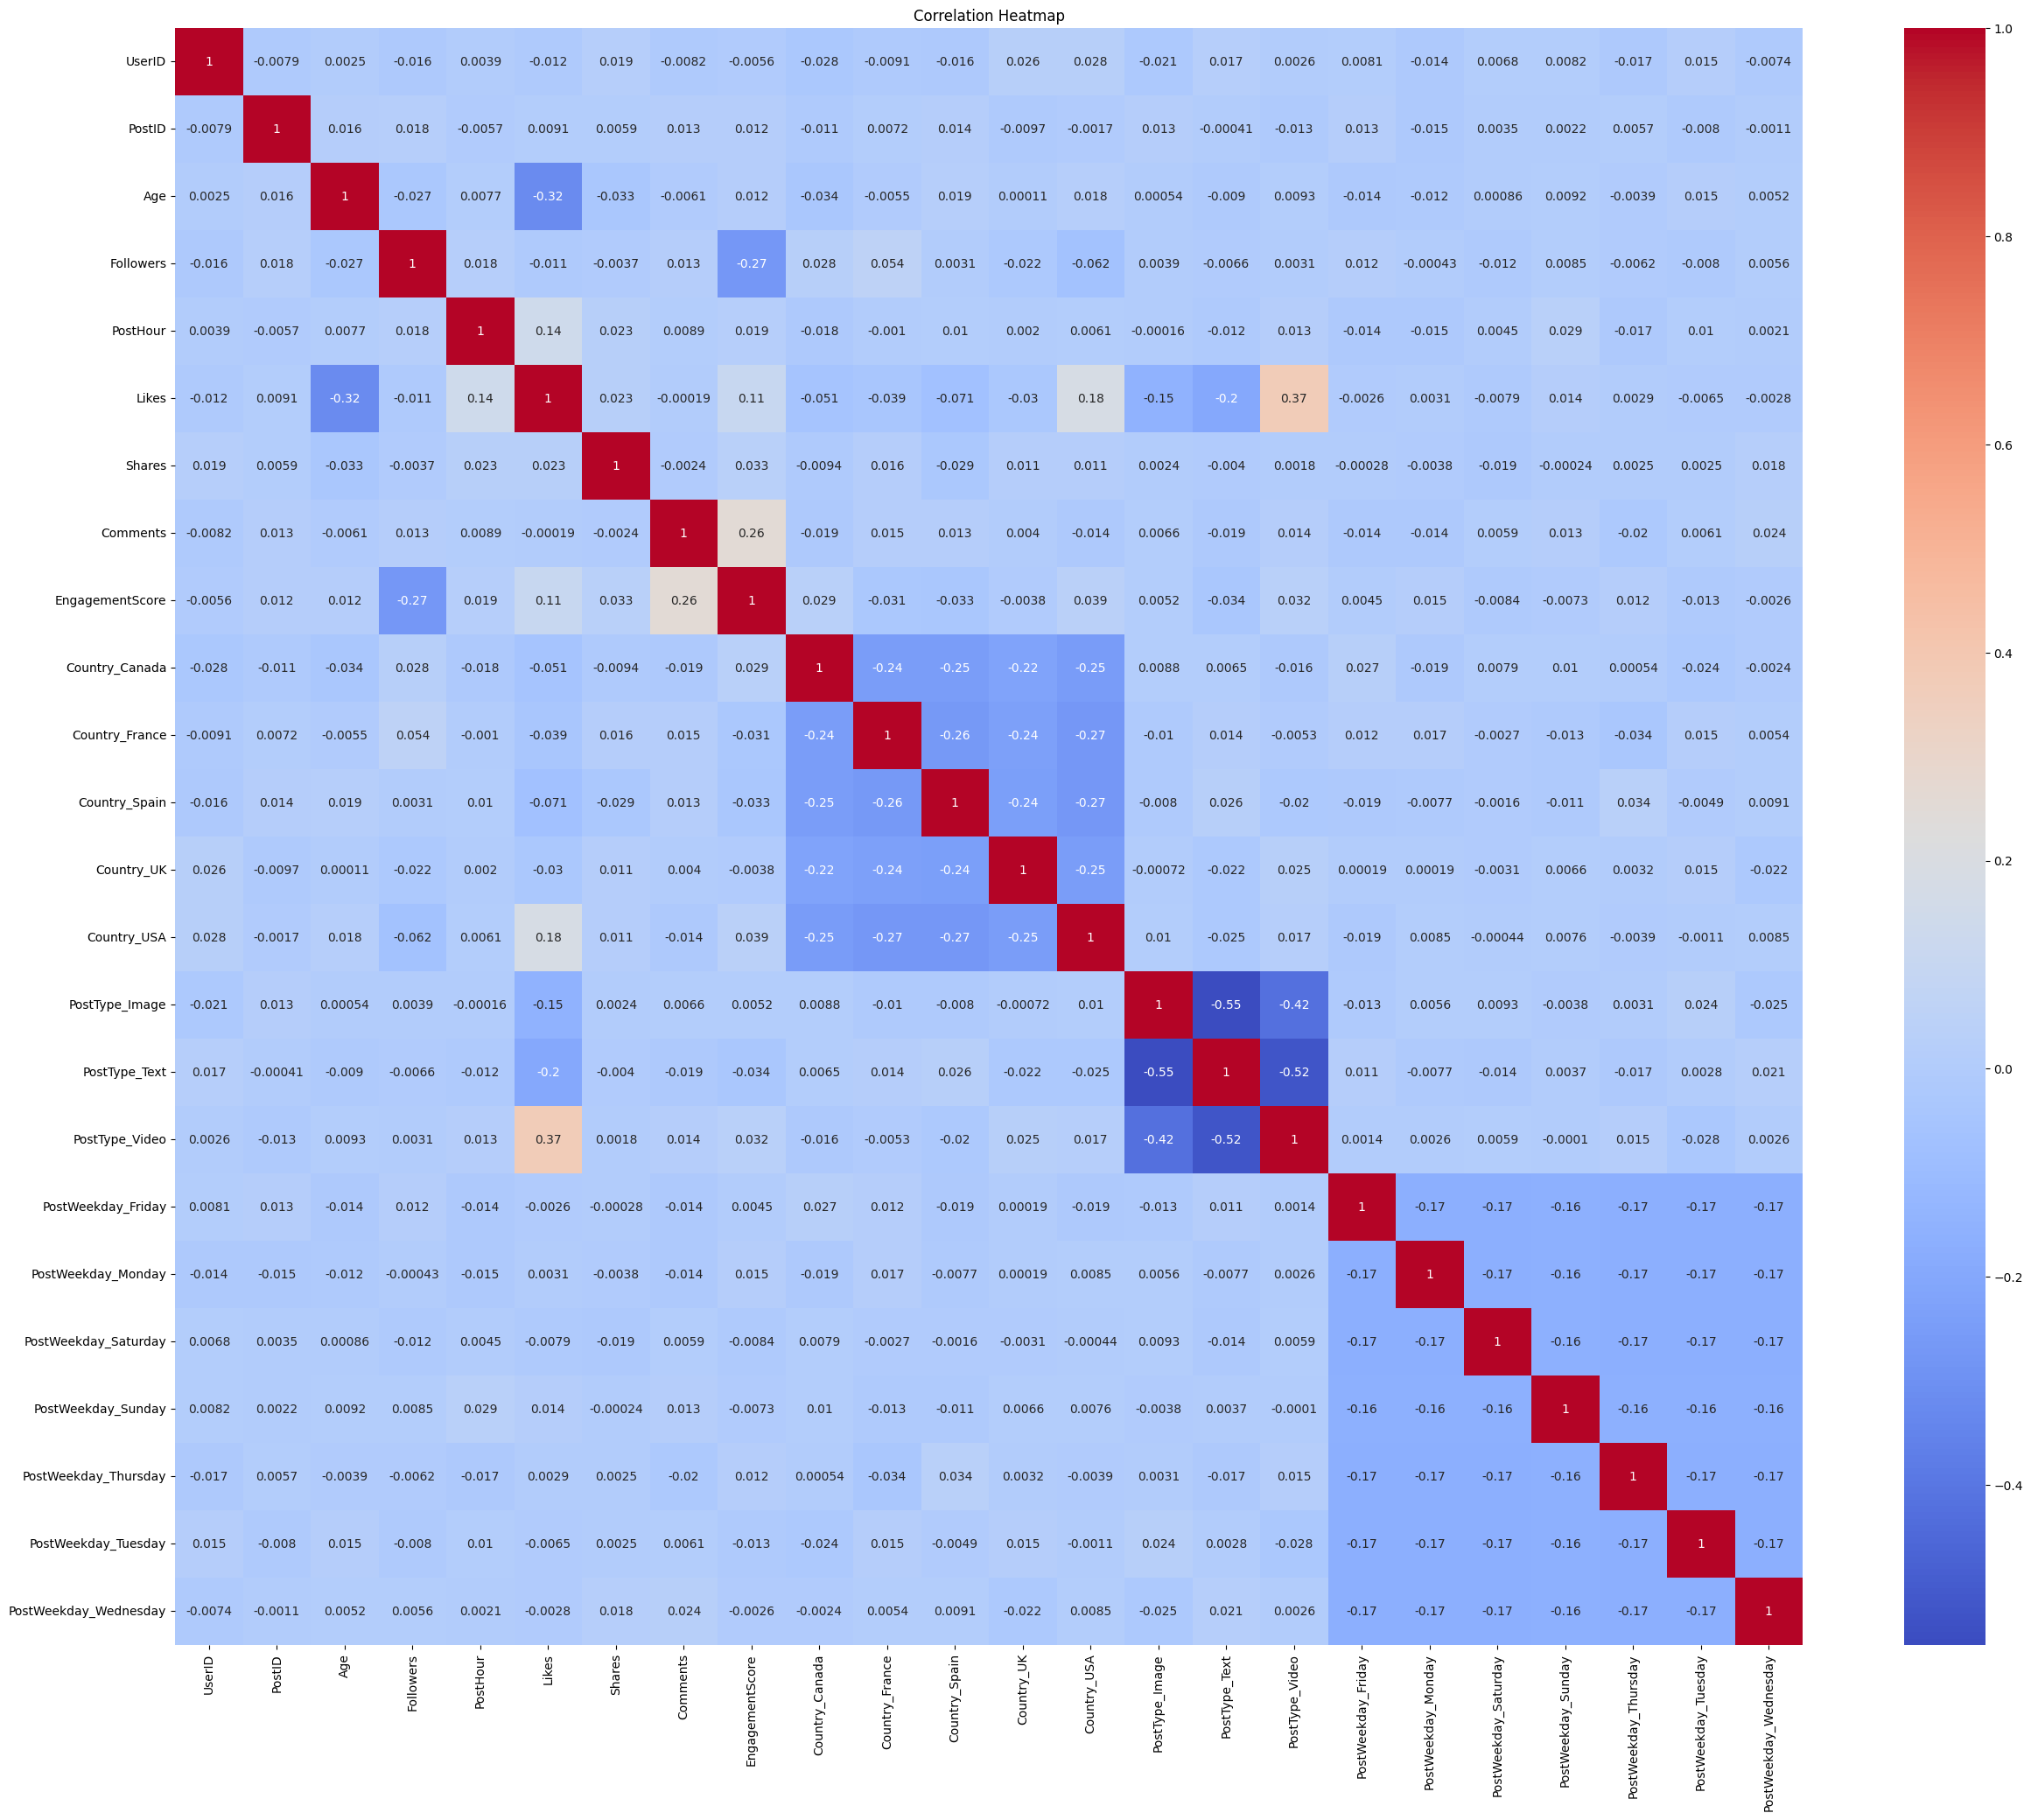

In [46]:
# Convert categorical variables to numeric using one-hot encoding
df_encoded = pd.get_dummies(df)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(30, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


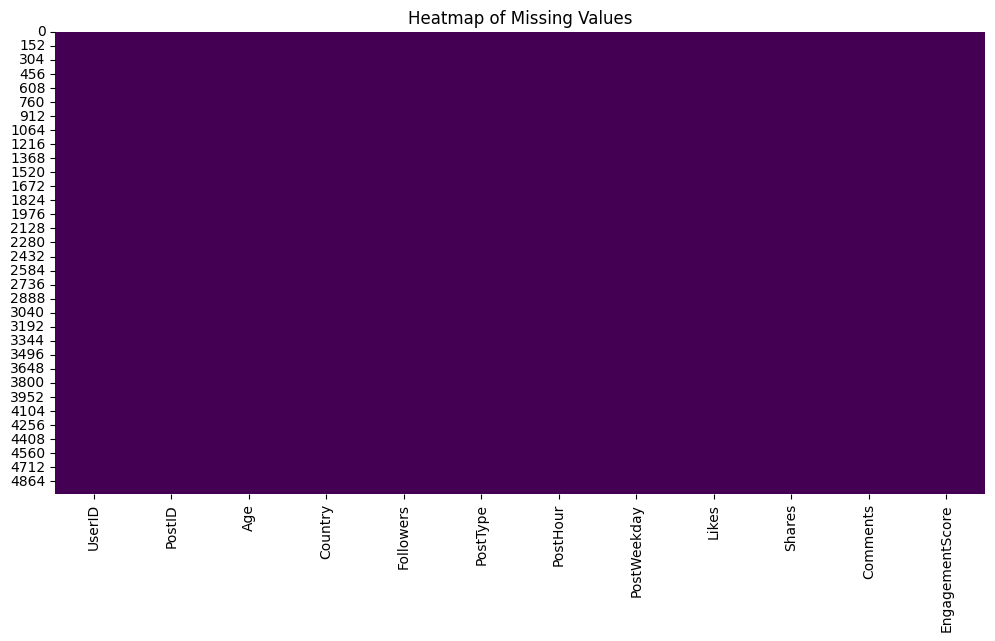

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for missing values heatmap using seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

In [48]:
df.dtypes

UserID               int64
PostID               int64
Age                  int64
Country             object
Followers            int64
PostType            object
PostHour             int64
PostWeekday         object
Likes                int64
Shares               int64
Comments             int64
EngagementScore    float64
dtype: object

In [56]:
df

,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments,EngagementScore
0,997,0,21,Canada,67,Text,22,Monday,21,4,2,0.447761
1,48,1,47,Canada,407,Video,18,Monday,20,5,4,0.105651
2,301,2,18,USA,174,Text,17,Monday,18,8,4,0.252874
3,880,3,22,UK,53,Video,6,Monday,116,7,10,3.056604
4,189,4,31,France,3,Text,8,Monday,24,5,1,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,566,4995,19,Canada,301,Text,16,Saturday,17,5,2,0.099668
4996,703,4996,41,USA,16,Video,20,Saturday,64,5,1,4.687500
4997,218,4997,49,UK,624,Text,12,Saturday,20,3,1,0.038462
4998,184,4998,18,Spain,321,Image,14,Saturday,18,5,3,0.121495


# Predict Engagement

In [49]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Sample data frame schema as described
df = pd.read_csv("/kaggle/input/engagement/y_posts.csv")

# Separating features from the target
X = df.drop(columns="EngagementScore")
y = df["EngagementScore"]

# Identifying columns by type
numerical_cols = ["UserID", "PostID", "Age", "Followers", "PostHour", "Likes", "Shares", "Comments"]
one_hot_cols = ["Country", "PostType"]
ordinal_cols = ["PostWeekday"]

# Define preprocessing for numerical columns
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define one-hot encoding for non-ordinal categorical columns
one_hot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define ordinal encoding for ordinal categorical columns
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ordinal', OrdinalEncoder())
])

# Combine all transformations using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('onehot', one_hot_transformer, one_hot_cols),
    ('ordinal', ordinal_transformer, ordinal_cols)
])

# Example pipeline for a model using this preprocessor
from sklearn.linear_model import LinearRegression
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Fit the pipeline on the training data
model_pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['UserID', 'PostID', 'Age',
                                                   'Followers', 'PostHour',
                                                   'Likes', 'Shares',
                                                   'Comments']),
                                                 ('onehot',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Country', 'PostType']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['PostWeekday'])])),
                ('model', LinearRegression())])

Evaluating Models:  90%|█████████ | 9/10 [02:05<00:13, 13.28s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] Start training from score 1.565763
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000894 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 958
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] Start training from score 1.575591
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 17
[LightGBM] [Info] Start training 

Evaluating Models: 100%|██████████| 10/10 [02:09<00:00, 12.95s/it]


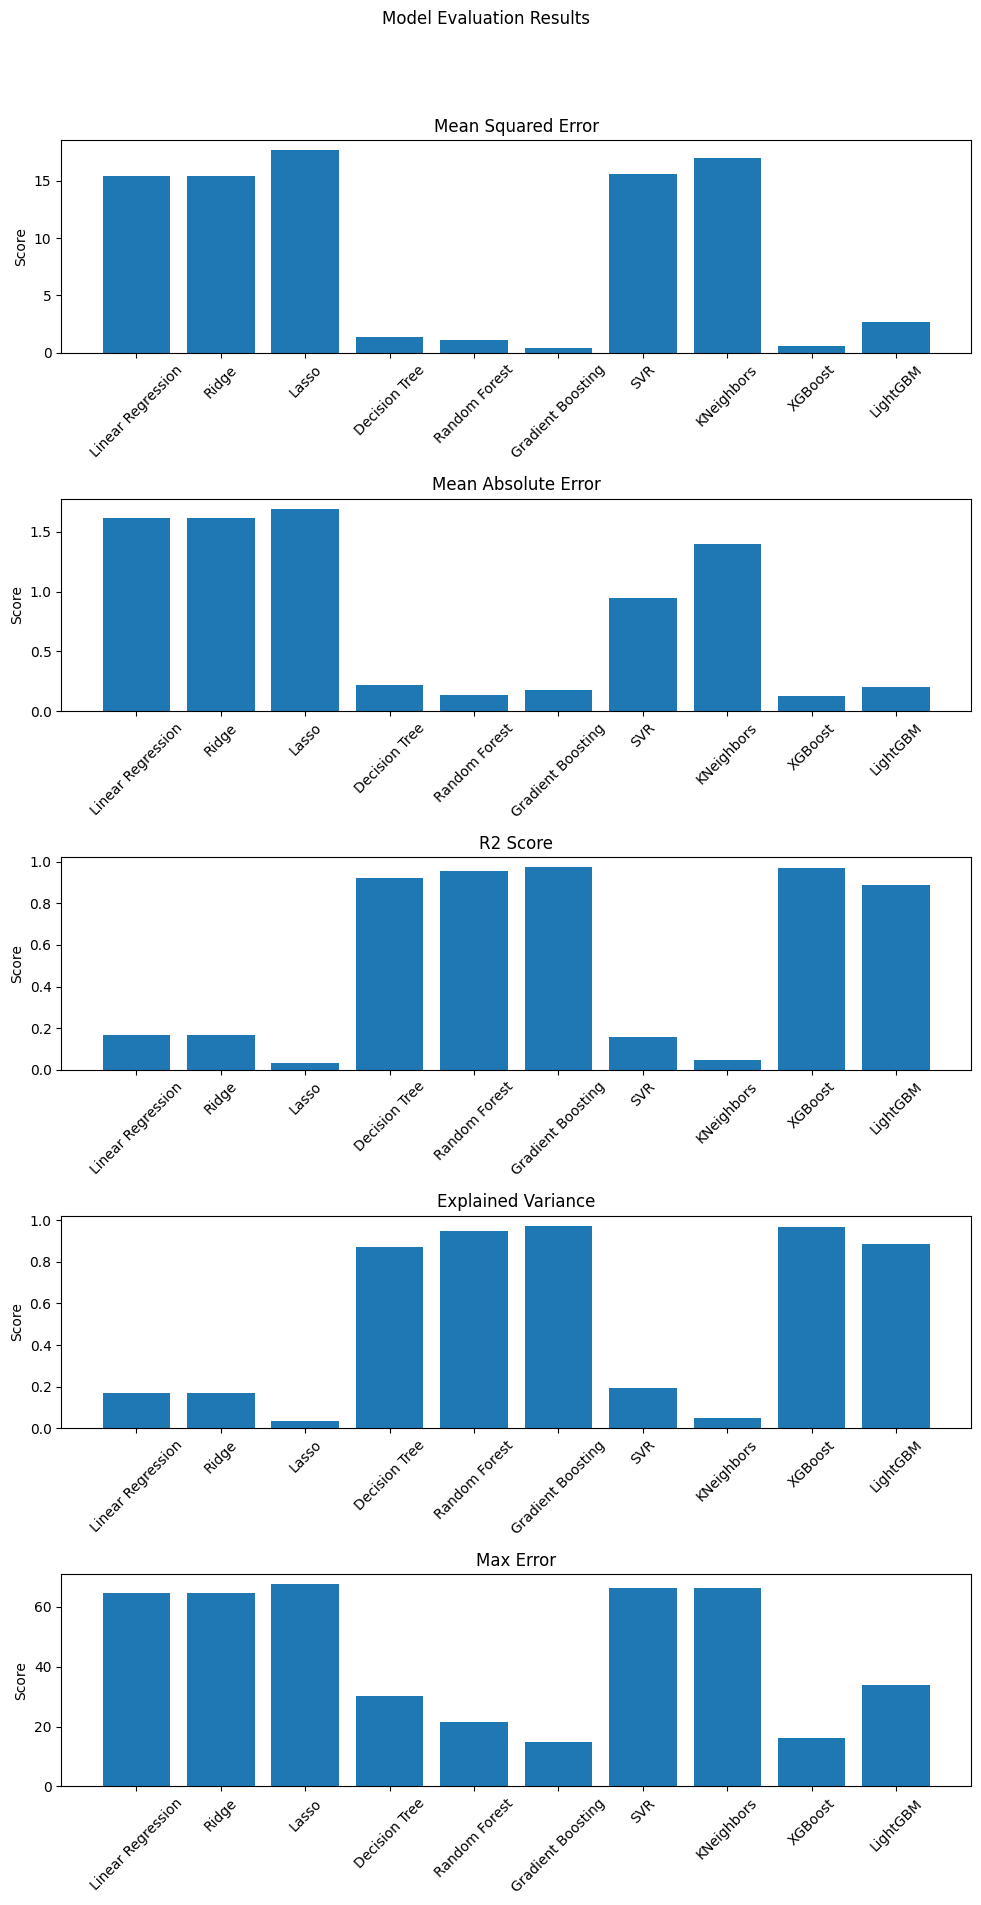

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Define metrics to evaluate
metrics = {
    'Mean Squared Error': mean_squared_error,
    'Mean Absolute Error': mean_absolute_error,
    'R2 Score': r2_score,
    'Explained Variance': explained_variance_score,
    'Max Error': max_error
}

# Initialize a dictionary to hold the cross-validated scores for each model-metric combination
evaluation_results = {model: {} for model in models}

# Evaluate each model using each metric
for model_name, model in tqdm(models.items(), desc='Evaluating Models'):
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    for metric_name, metric_function in metrics.items():
        scorer = make_scorer(metric_function, greater_is_better=False)
        scores = cross_val_score(pipeline, X, y, cv=5, scoring=scorer)
        evaluation_results[model_name][metric_name] = np.abs(np.mean(scores))

# Plotting the results
fig, axs = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 4))
fig.suptitle('Model Evaluation Results')

for idx, (metric_name, _) in enumerate(metrics.items()):
    values = [evaluation_results[model_name][metric_name] for model_name in models]
    axs[idx].bar(models.keys(), values)
    axs[idx].set_title(metric_name)
    axs[idx].set_ylabel('Score')
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


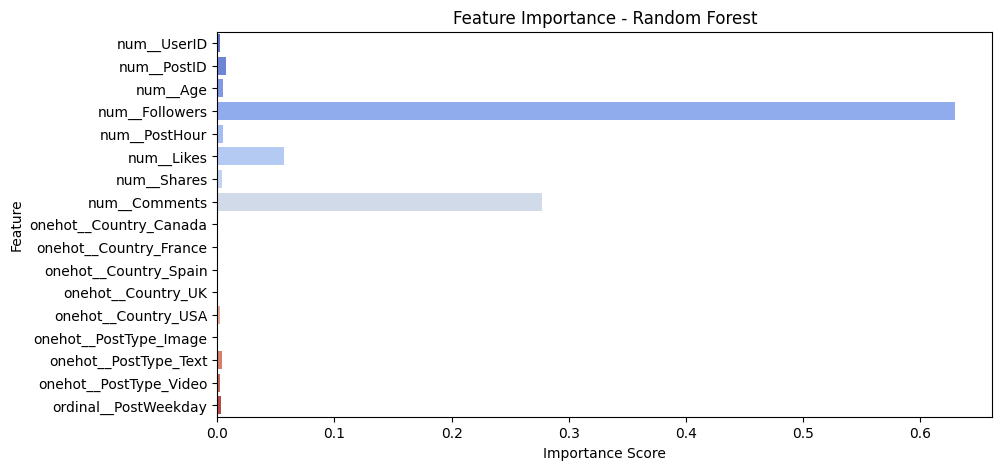

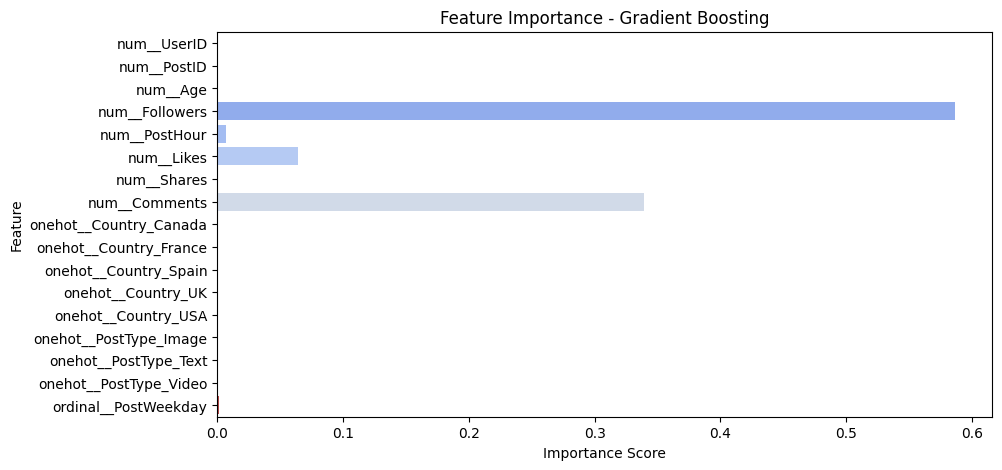

In [51]:
from sklearn.tree import plot_tree, export_text
import seaborn as sns

# Train Random Forest and Gradient Boosting on the whole dataset
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
decision_tree = DecisionTreeRegressor()

# Fit the models directly to the data
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('model', random_forest)
])
pipeline_gb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', gradient_boosting)
])
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('model', decision_tree)
])

pipeline_rf.fit(X, y)
pipeline_gb.fit(X, y)
pipeline_dt.fit(X, y)

# Extract feature importance from Random Forest
rf_feature_importance = random_forest.feature_importances_
gb_feature_importance = gradient_boosting.feature_importances_

# Get feature names from the preprocessing step
feature_names = pipeline_rf.named_steps['preprocessor'].get_feature_names_out()

# Plot feature importance for Random Forest
plt.figure(figsize=(10, 5))
sns.barplot(x=rf_feature_importance, y=feature_names, palette='coolwarm')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Plot feature importance for Gradient Boosting
plt.figure(figsize=(10, 5))
sns.barplot(x=gb_feature_importance, y=feature_names, palette='coolwarm')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [52]:
X

,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments
0,997,0,21,Canada,67,Text,22,Monday,21,4,2
1,48,1,47,Canada,407,Video,18,Monday,20,5,4
2,301,2,18,USA,174,Text,17,Monday,18,8,4
3,880,3,22,UK,53,Video,6,Monday,116,7,10
4,189,4,31,France,3,Text,8,Monday,24,5,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,566,4995,19,Canada,301,Text,16,Saturday,17,5,2
4996,703,4996,41,USA,16,Video,20,Saturday,64,5,1
4997,218,4997,49,UK,624,Text,12,Saturday,20,3,1
4998,184,4998,18,Spain,321,Image,14,Saturday,18,5,3


# Understand engagement

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

# Select the most important features
important_features = ['Followers', 'Likes', 'Comments', 'PostHour', 'Shares']
X_selected = X[important_features]

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R2 score and MAE using cross-validation
r2_scores = cross_val_score(model, X_selected, y, cv=kf, scoring='r2')
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(model, X_selected, y, cv=kf, scoring=mae_scorer)

# Mean scores
mean_r2_score = np.mean(r2_scores)
mean_mae_score = np.abs(np.mean(mae_scores))

# Fit the model to compute feature importances
model.fit(X_selected, y)
feature_importances = model.feature_importances_

# Print the scores
print(f"R2 Score for model with selected features: {mean_r2_score:.4f}")
print(f"Mean Absolute Error (MAE) for model with selected features: {mean_mae_score:.4f}")

# Print the feature importances
feature_importance_dict = {feature: importance for feature, importance in zip(important_features, feature_importances)}

print("\nFeature Importances (by Random Forest):")
for feature, importance in feature_importance_dict.items():
    print(f" - {feature}: {importance:.4f}")

R2 Score for model with selected features: 0.9320
Mean Absolute Error (MAE) for model with selected features: 0.3551

Feature Importances (by Random Forest):
 - Followers: 0.6438
 - Likes: 0.0543
 - Comments: 0.2913
 - PostHour: 0.0059
 - Shares: 0.0047


|--- Followers <= 11.50
|   |--- Comments <= 30.50
|   |   |--- Followers <= 5.50
|   |   |   |--- Likes <= 70.00
|   |   |   |   |--- value: [10.53]
|   |   |   |--- Likes >  70.00
|   |   |   |   |--- value: [29.20]
|   |   |--- Followers >  5.50
|   |   |   |--- Likes <= 49.50
|   |   |   |   |--- value: [4.43]
|   |   |   |--- Likes >  49.50
|   |   |   |   |--- value: [13.47]
|   |--- Comments >  30.50
|   |   |--- Followers <= 3.50
|   |   |   |--- Likes <= 13.50
|   |   |   |   |--- value: [89.00]
|   |   |   |--- Likes >  13.50
|   |   |   |   |--- value: [57.67]
|   |   |--- Followers >  3.50
|   |   |   |--- Followers <= 7.50
|   |   |   |   |--- value: [34.51]
|   |   |   |--- Followers >  7.50
|   |   |   |   |--- value: [19.12]
|--- Followers >  11.50
|   |--- Followers <= 37.50
|   |   |--- Comments <= 29.50
|   |   |   |--- Likes <= 48.50
|   |   |   |   |--- value: [1.76]
|   |   |   |--- Likes >  48.50
|   |   |   |   |--- value: [4.69]
|   |   |--- Comments >  29.50
|

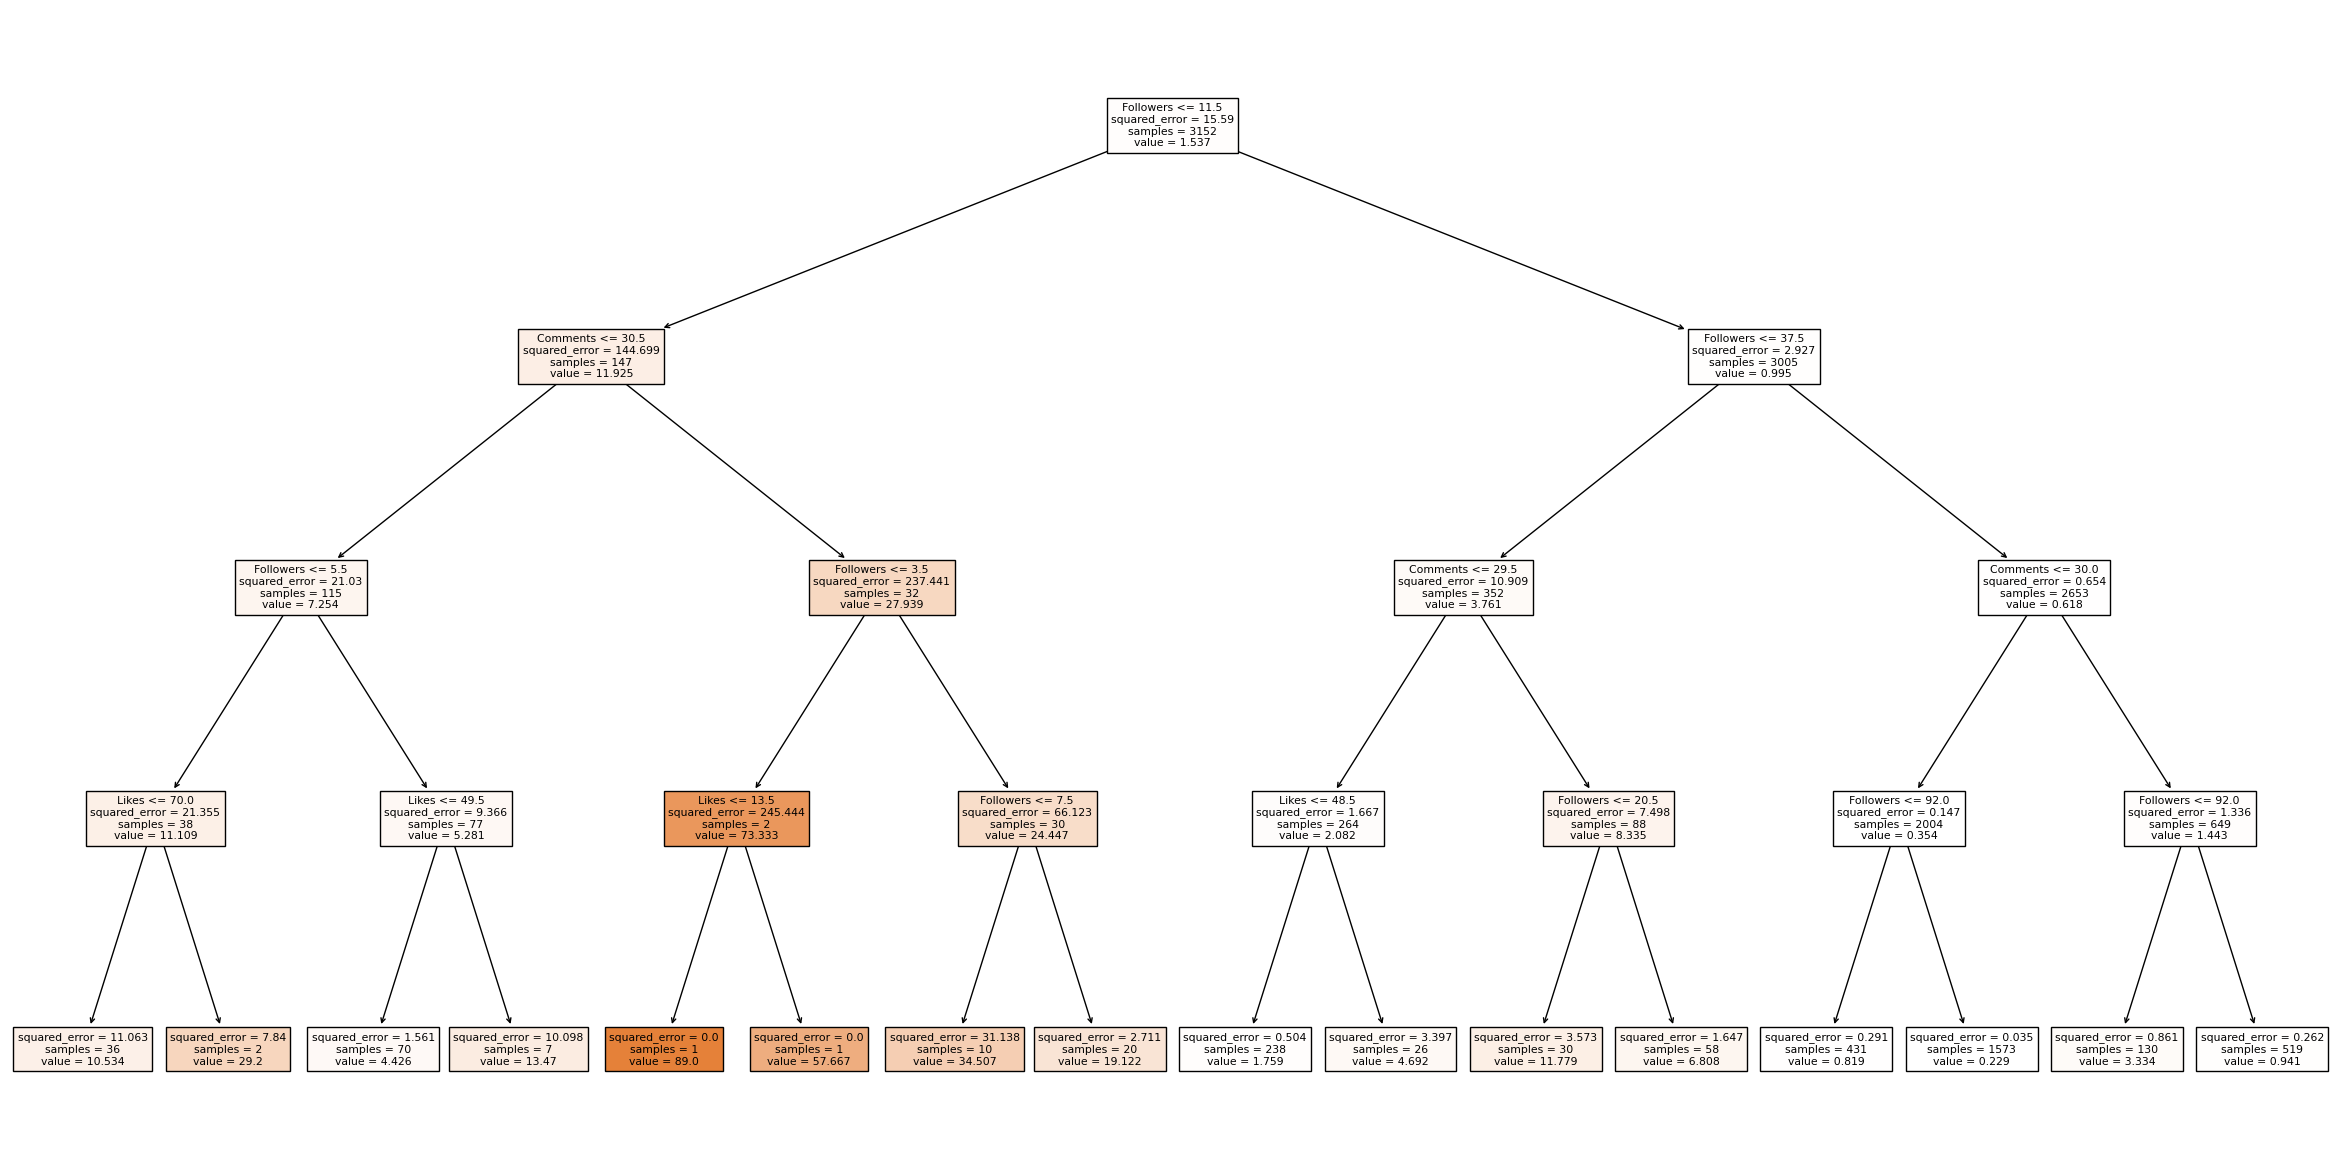

In [54]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Fit the Random Forest model
model.fit(X_selected, y)

# Extract one tree from the forest
estimator = model.estimators_[0]

# Print the tree structure
tree_text = export_text(estimator, feature_names=important_features, max_depth=4)
print(tree_text)

# Visualize the tree
plt.figure(figsize=(30, 15))
plot_tree(estimator, feature_names=important_features, filled=True, max_depth=4)
plt.savefig('tree.png')
plt.show()


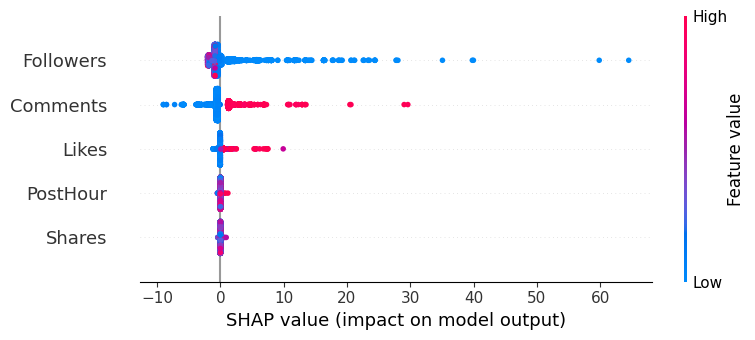

In [55]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_selected)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_selected, feature_names=important_features)


# Predict Comments and Likes

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Read the raw DataFrame
df = pd.read_csv("/kaggle/input/engagement/y_posts.csv")

# Step 2: Split features and target variables
X = df.drop(columns=['Comments', 'Likes', 'Shares','EngagementScore'])
y_comments = df['Comments']
y_likes = df['Likes']

# Step 3: Splitting data into train and test sets
X_train, X_test, y_comments_train, y_comments_test, y_likes_train, y_likes_test = train_test_split(X, y_comments, y_likes, test_size=0.2, random_state=42)

# Step 4: Define categorical and numerical features
categorical_features = ['Country', 'PostType', 'PostWeekday']
numerical_features = ['Age', 'Followers', 'PostHour']

# Step 5: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Step 6: Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the names of the columns after preprocessing
column_names = preprocessor.named_transformers_['num'].get_feature_names_out(numerical_features).tolist()
column_names += preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist()

# Convert the list to a DataFrame for better readability
column_names_df = pd.DataFrame(column_names, columns=['Column_Name'])

# Print the DataFrame containing column names
print(column_names_df)

              Column_Name
0                     Age
1               Followers
2                PostHour
3          Country_Canada
4          Country_France
5           Country_Spain
6              Country_UK
7             Country_USA
8          PostType_Image
9           PostType_Text
10         PostType_Video
11     PostWeekday_Friday
12     PostWeekday_Monday
13   PostWeekday_Saturday
14     PostWeekday_Sunday
15   PostWeekday_Thursday
16    PostWeekday_Tuesday
17  PostWeekday_Wednesday


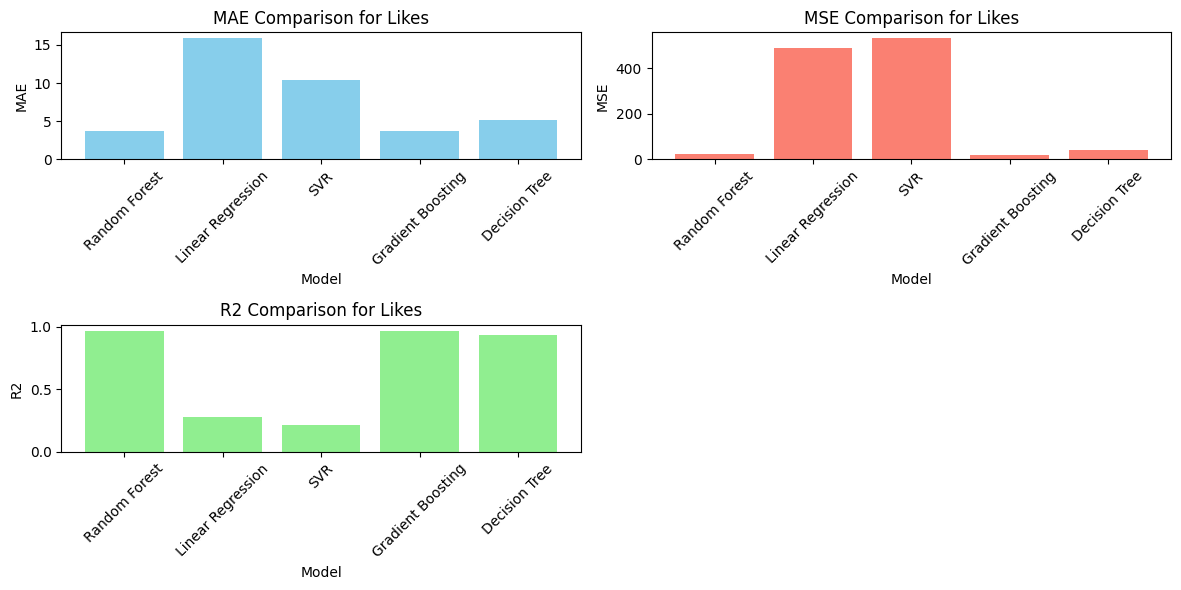

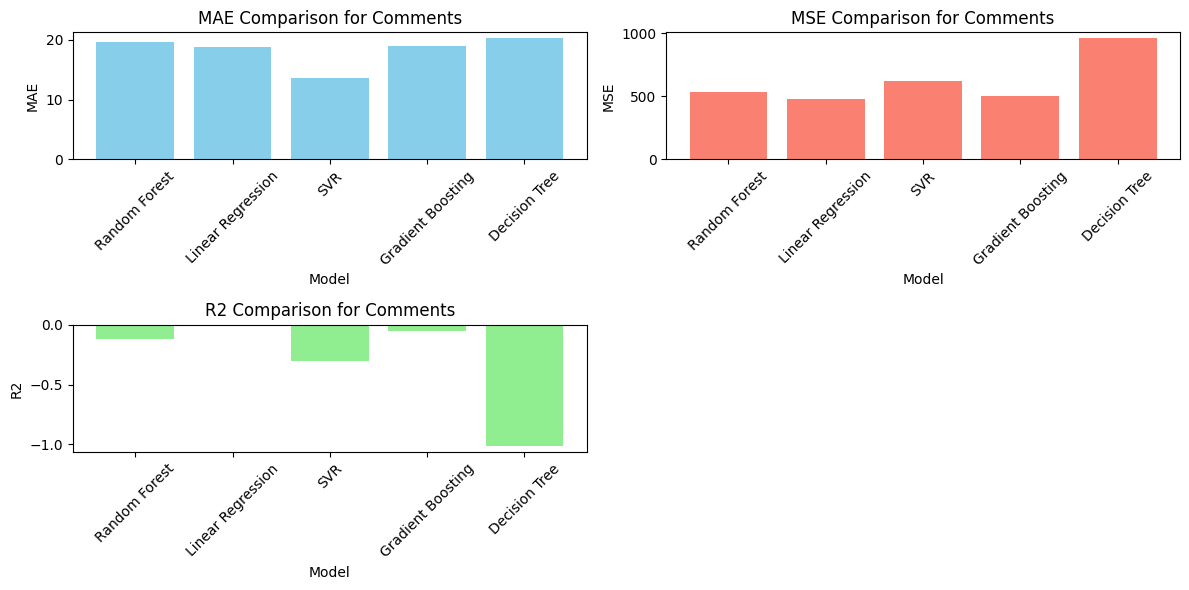

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Define preprocessing pipeline and regressor
    pipeline = Pipeline([
        ('regressor', model)
    ])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    predictions = pipeline.predict(X_test)
    
    # Evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    return mae, mse, r2

# Load your data and split it into features and targets for both likes and comments
# Assuming X_likes_train, X_likes_test, y_likes_train, y_likes_test, X_comments_train, X_comments_test, y_comments_train, y_comments_test are defined

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42)
}

results_likes = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}
results_comments = {'Model': [], 'MAE': [], 'MSE': [], 'R2': []}

# Iterate over models
for name, model in models.items():
    # Train and evaluate model for likes
    mae_likes, mse_likes, r2_likes = train_evaluate_model(model, X_train_preprocessed, y_likes_train, X_test_preprocessed, y_likes_test)
    
    # Store results for likes prediction
    results_likes['Model'].append(name)
    results_likes['MAE'].append(mae_likes)
    results_likes['MSE'].append(mse_likes)
    results_likes['R2'].append(r2_likes)
    
    # Train and evaluate model for comments
    mae_comments, mse_comments, r2_comments = train_evaluate_model(model, X_train_preprocessed, y_comments_train, X_test_preprocessed, y_comments_test)
    
    # Store results for comments prediction
    results_comments['Model'].append(name)
    results_comments['MAE'].append(mae_comments)
    results_comments['MSE'].append(mse_comments)
    results_comments['R2'].append(r2_comments)

# Convert results to DataFrames
results_likes_df = pd.DataFrame(results_likes)
results_comments_df = pd.DataFrame(results_comments)

# Plot results for Likes prediction
plt.figure(figsize=(12, 6))

# MAE comparison for Likes
plt.subplot(2, 2, 1)
plt.bar(results_likes_df['Model'], results_likes_df['MAE'], color='skyblue')
plt.title('MAE Comparison for Likes')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# MSE comparison for Likes
plt.subplot(2, 2, 2)
plt.bar(results_likes_df['Model'], results_likes_df['MSE'], color='salmon')
plt.title('MSE Comparison for Likes')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# R2 comparison for Likes
plt.subplot(2, 2, 3)
plt.bar(results_likes_df['Model'], results_likes_df['R2'], color='lightgreen')
plt.title('R2 Comparison for Likes')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plot results for Comments prediction
plt.figure(figsize=(12, 6))

# MAE comparison for Comments
plt.subplot(2, 2, 1)
plt.bar(results_comments_df['Model'], results_comments_df['MAE'], color='skyblue')
plt.title('MAE Comparison for Comments')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45)

# MSE comparison for Comments
plt.subplot(2, 2, 2)
plt.bar(results_comments_df['Model'], results_comments_df['MSE'], color='salmon')
plt.title('MSE Comparison for Comments')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)

# R2 comparison for Comments
plt.subplot(2, 2, 3)
plt.bar(results_comments_df['Model'], results_comments_df['R2'], color='lightgreen')
plt.title('R2 Comparison for Comments')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Understand likes

In [98]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np

important_features = column_names  # Assuming column_names contains the column names after preprocessing

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=4)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate R2 score and MAE using cross-validation
r2_scores = cross_val_score(model, X_train_preprocessed, y_likes_train, cv=kf, scoring='r2')
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(model, X_train_preprocessed, y_likes_train, cv=kf, scoring=mae_scorer)

# Mean scores
mean_r2_score = np.mean(r2_scores)
mean_mae_score = np.abs(np.mean(mae_scores))

# Fit the model to compute feature importances
model.fit(X_train_preprocessed, y_likes_train)
feature_importances = model.feature_importances_

# Print the scores
print(f"R2 Score for model with selected features: {mean_r2_score:.4f}")
print(f"Mean Absolute Error (MAE) for model with selected features: {mean_mae_score:.4f}")

# Print the feature importances
feature_importance_dict = {feature: importance for feature, importance in zip(important_features, feature_importances)}

print("\nFeature Importances (by Random Forest):")
for feature, importance in feature_importance_dict.items():
    print(f" - {feature}: {importance:.4f}")


R2 Score for model with selected features: 0.9732
Mean Absolute Error (MAE) for model with selected features: 3.5456

Feature Importances (by Random Forest):
 - Age: 0.2030
 - Followers: 0.0003
 - PostHour: 0.1381
 - Country_Canada: 0.0000
 - Country_France: 0.0000
 - Country_Spain: 0.0000
 - Country_UK: 0.0000
 - Country_USA: 0.0406
 - PostType_Image: 0.0000
 - PostType_Text: 0.0000
 - PostType_Video: 0.6177
 - PostWeekday_Friday: 0.0000
 - PostWeekday_Monday: 0.0000
 - PostWeekday_Saturday: 0.0000
 - PostWeekday_Sunday: 0.0000
 - PostWeekday_Thursday: 0.0000
 - PostWeekday_Tuesday: 0.0000
 - PostWeekday_Wednesday: 0.0000


|--- Age <= -0.98
|   |--- PostType_Video <= 0.50
|   |   |--- Country_USA <= 0.50
|   |   |   |--- Age <= -1.09
|   |   |   |   |--- value: [20.12]
|   |   |   |--- Age >  -1.09
|   |   |   |   |--- value: [18.36]
|   |   |--- Country_USA >  0.50
|   |   |   |--- PostHour <= 0.82
|   |   |   |   |--- value: [20.57]
|   |   |   |--- PostHour >  0.82
|   |   |   |   |--- value: [71.40]
|   |--- PostType_Video >  0.50
|   |   |--- Country_USA <= 0.50
|   |   |   |--- Followers <= -0.52
|   |   |   |   |--- value: [117.07]
|   |   |   |--- Followers >  -0.52
|   |   |   |   |--- value: [119.71]
|   |   |--- Country_USA >  0.50
|   |   |   |--- PostHour <= 0.82
|   |   |   |   |--- value: [120.45]
|   |   |   |--- PostHour >  0.82
|   |   |   |   |--- value: [168.31]
|--- Age >  -0.98
|   |--- Country_USA <= 0.50
|   |   |--- Followers <= 5.05
|   |   |   |--- Followers <= 3.29
|   |   |   |   |--- value: [19.94]
|   |   |   |--- Followers >  3.29
|   |   |   |   |--- value: [23.12]
|   | 

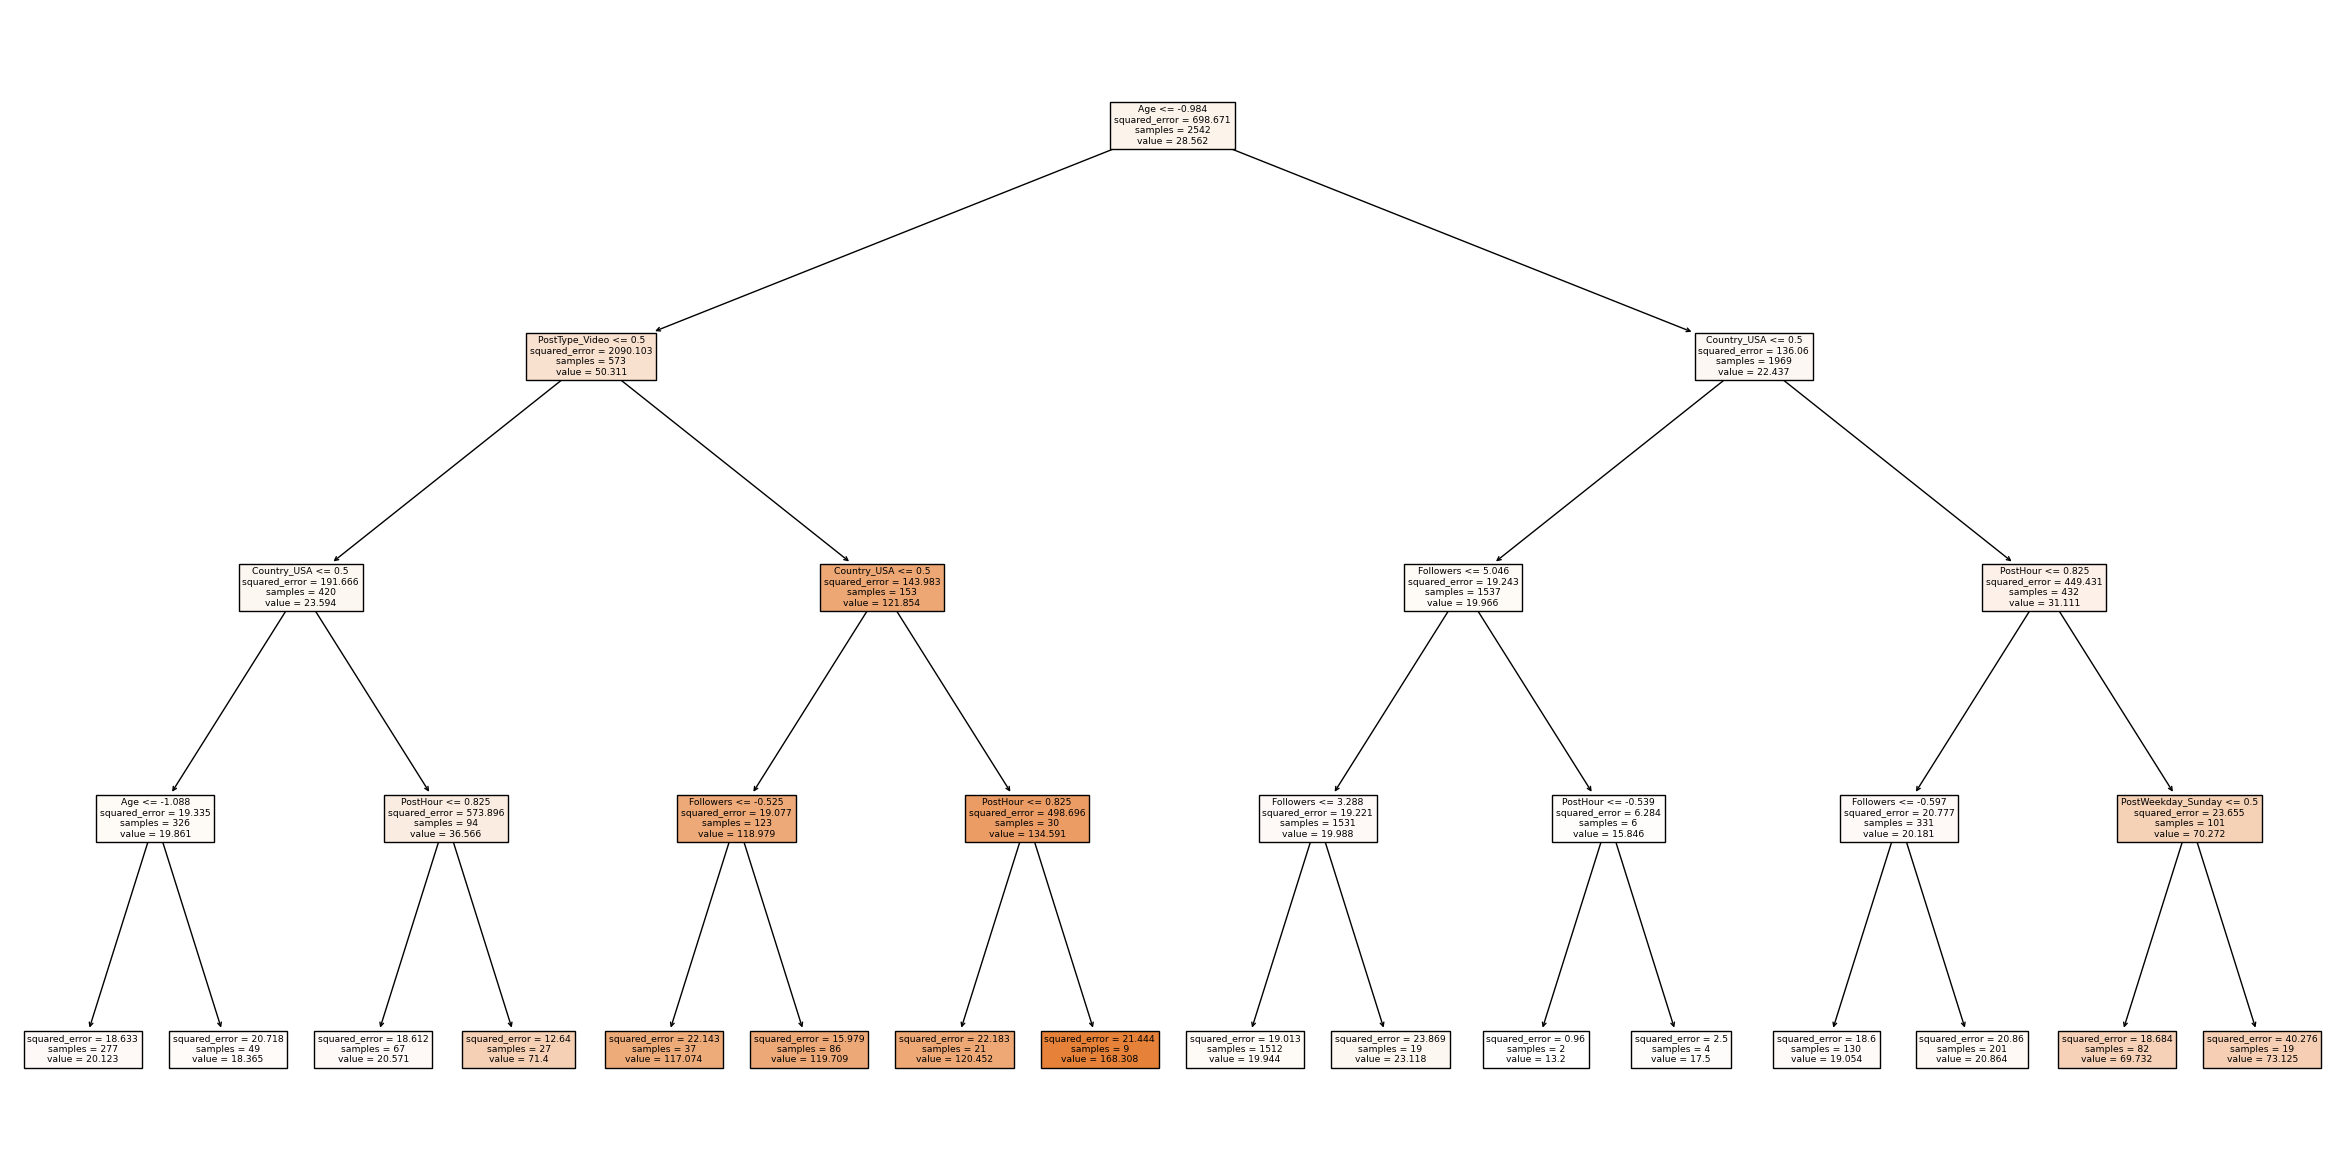

In [99]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

# Fit the Random Forest model
model.fit(pd.DataFrame(X_train_preprocessed), y_likes_train)

# Extract one tree from the forest
estimator = model.estimators_[0]

# Print the tree structure
tree_text = export_text(estimator, feature_names=important_features, max_depth=4)
print(tree_text)

# Visualize the tree
plt.figure(figsize=(30, 15))
plot_tree(estimator, feature_names=important_features, filled=True, max_depth=4)
plt.savefig('tree_likes.png')
plt.show()


In [7]:
df

,UserID,PostID,Age,Country,Followers,PostType,PostHour,PostWeekday,Likes,Shares,Comments,EngagementScore
0,997,0,21,Canada,67,Text,22,Monday,21,4,2,0.447761
1,48,1,47,Canada,407,Video,18,Monday,20,5,4,0.105651
2,301,2,18,USA,174,Text,17,Monday,18,8,4,0.252874
3,880,3,22,UK,53,Video,6,Monday,116,7,10,3.056604
4,189,4,31,France,3,Text,8,Monday,24,5,1,11.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,566,4995,19,Canada,301,Text,16,Saturday,17,5,2,0.099668
4996,703,4996,41,USA,16,Video,20,Saturday,64,5,1,4.687500
4997,218,4997,49,UK,624,Text,12,Saturday,20,3,1,0.038462
4998,184,4998,18,Spain,321,Image,14,Saturday,18,5,3,0.121495


# Extract Formula

In [10]:
import numpy as np
from scipy.optimize import curve_fit

# Define the multiplicative model
def engagement_model(x, k, m, n, p):
    likes, comments, followers = x
    return k * (likes ** m) * (comments ** n) / ((followers + 1) ** p)

# Extract data from the DataFrame
likes_data = df['Likes'].values
comments_data = df['Comments'].values
followers_data = df['Followers'].values
engagement_scores = df['EngagementScore'].values

# Fit the model to the data
popt, pcov = curve_fit(engagement_model, (likes_data, comments_data, followers_data), engagement_scores)

# Extract the fitted parameters
k_fit, m_fit, n_fit, p_fit = popt

print("Fitted Parameters:")
print("k:", k_fit)
print("m:", m_fit)
print("n:", n_fit)
print("p:", p_fit)


Fitted Parameters:
k: 16.515577302436494
m: 0.3275369986070907
n: 0.46836187204691426
p: 1.1289326241283095


In [14]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate predicted engagement scores using the fitted parameters
predicted_engagement_scores = engagement_model((likes_data, comments_data, followers_data), *popt)

# Calculate Mean Squared Error (MSE)
mae = mean_absolute_error(engagement_scores, predicted_engagement_scores)

# Calculate R-squared
r2 = r2_score(engagement_scores, predicted_engagement_scores)

print("Mean absolute Error (MAE):", mae)
print("R-squared:", r2)

Mean absolute Error (MAE): 0.2957553568760472
R-squared: 0.9600977375803951
